Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: 

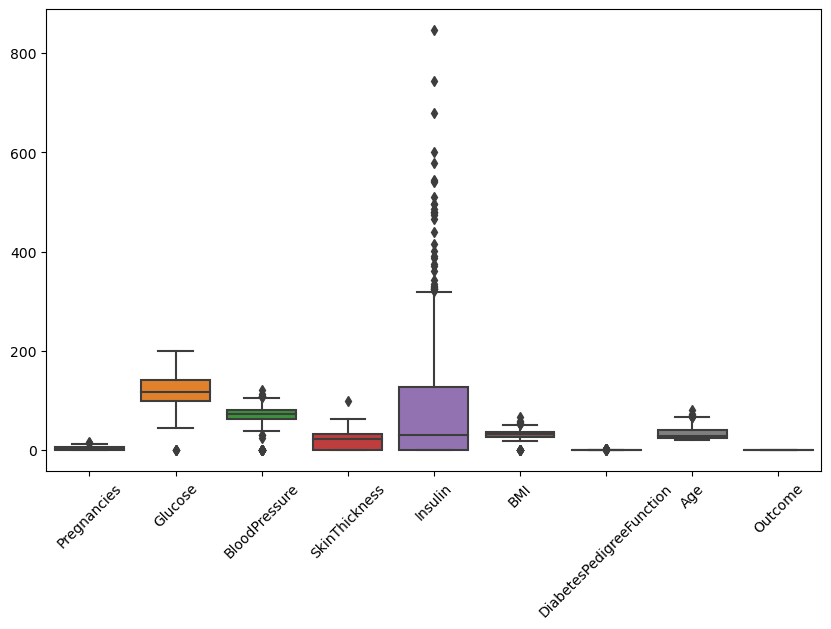

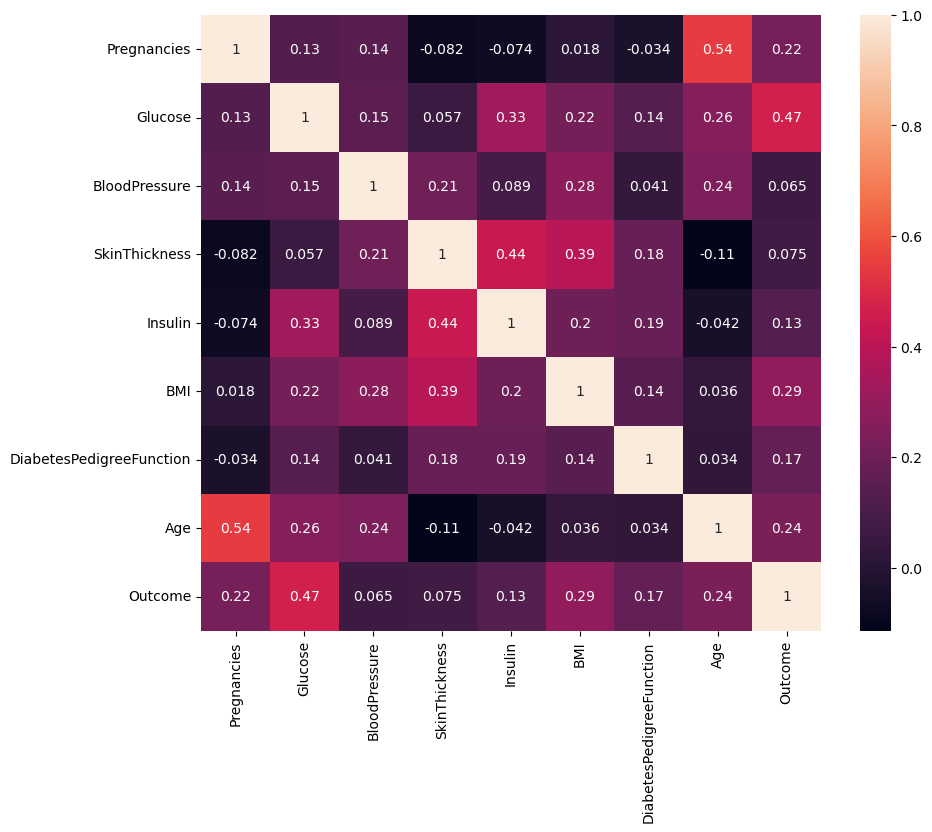

Accuracy: 0.7532467532467533
Confusion Matrix:
 [[79 20]
 [18 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

Outcome: 0


F:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
F:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [1]:
#Step 2: Perform EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('diabetes.csv')

# Check for missing values
print(df.isna().sum())

# Get an overview of the data
print(df.info())

# Check the distribution of categorical variables
print(df['Pregnancies'].value_counts())
print(df['Outcome'].value_counts())

# Check the distribution of numerical variables
print(df.describe())

# Check for outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

# Check for correlations
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.show()


#Step 3: Data preprocessing

# Scale numerical variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df[num_cols] = scaler.fit_transform(df[num_cols])

# Encode categorical variable
df['Outcome'] = df['Outcome'].astype('category')

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



#Step 4: Build the Machine Learning Model

# Build the logistic regression model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)



#Step 5: Evaluate Model Performance

# Evaluate model performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = logreg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


#Step 6: Get the final model and prediction

# Predict outcome for a new patient
new_patient = [[2, 120, 70, 30, 135, 43.1, 0.43, 25]]
new_patient = scaler.transform(new_patient)
outcome = logreg.predict(new_patient)[0]
print("Outcome:", outcome)